In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs2/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs2/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_3',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_3',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.3_.5_.95',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_1e-24',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_3',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_3',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.3_.5_.95',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_1e-24',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1100

nband = 115

nv = 200

dv = 0.005

tsfc = 294.0

ng = 3

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 3 /)

data wgt
     &     /.3, .5, .95/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 1e-24

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

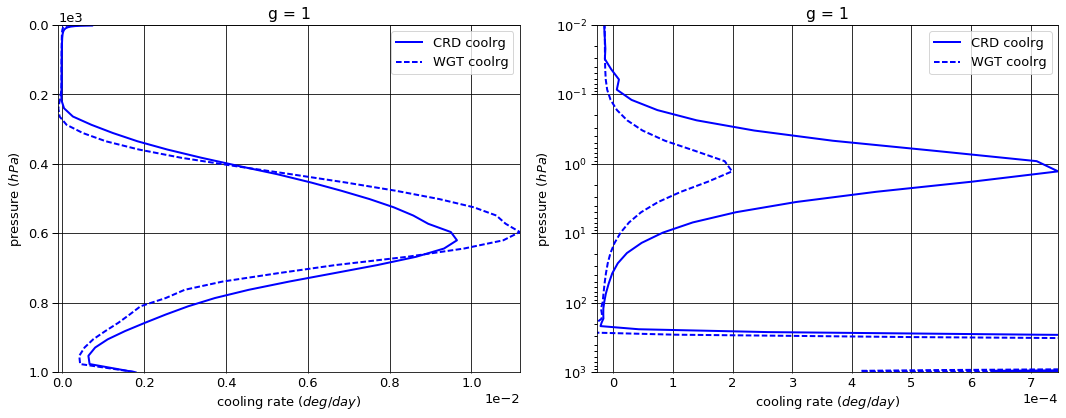

# Figure: cooling rate g-group 2

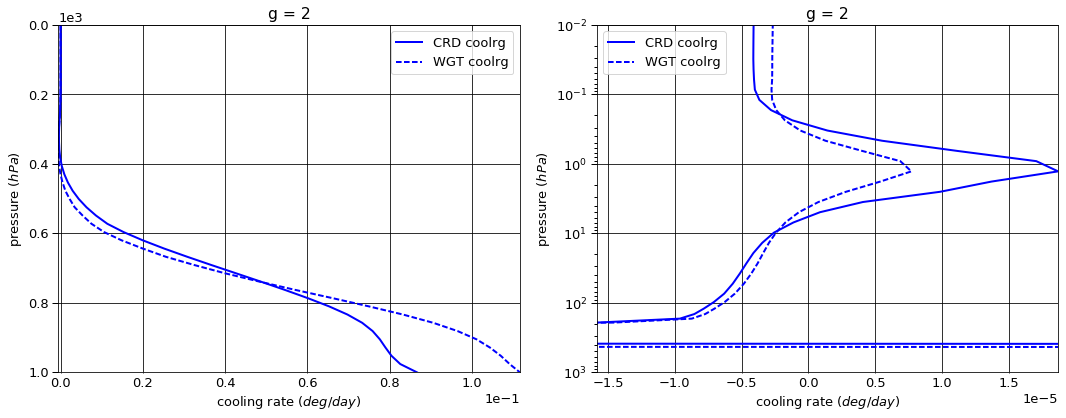

# Figure: cooling rate g-group 3

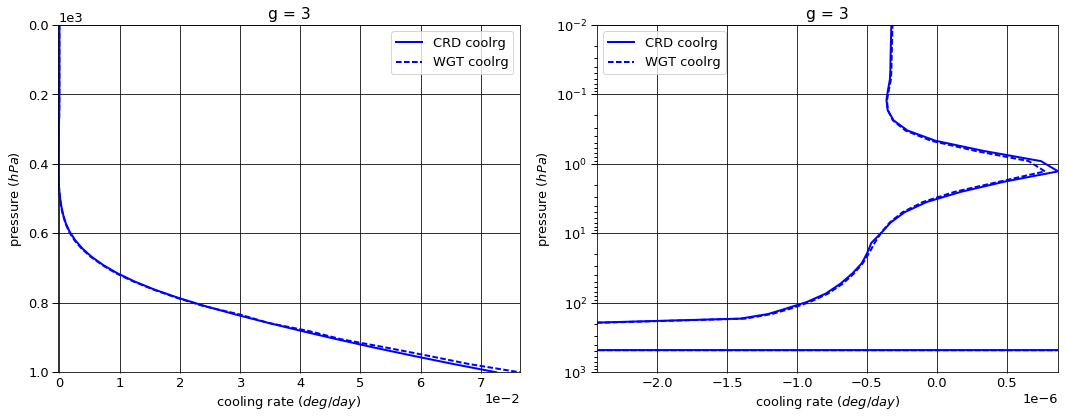

# Figure: cooling rate g-group total

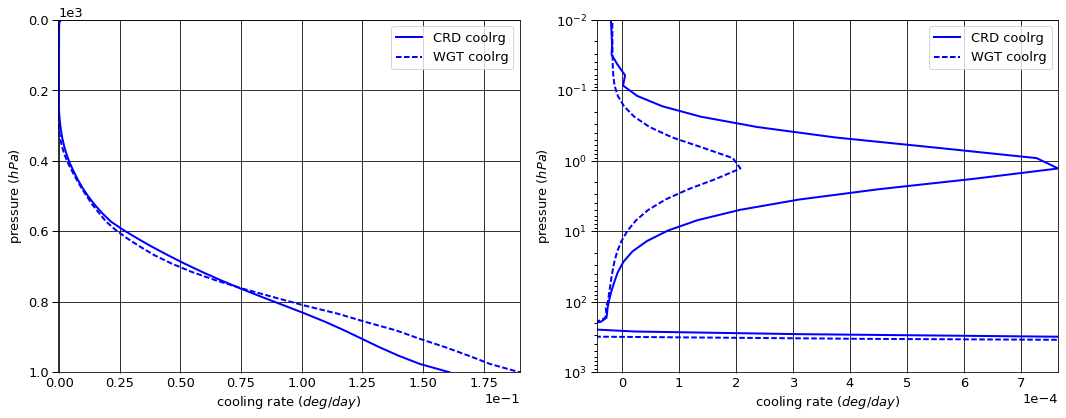

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.414538  0.000000  -0.414538
  1013.0   76     -0.828346  0.822487  -0.005859
2 0.0      1      -5.589743  0.000000  -5.589743
  1013.0   76     -6.434367  3.825143  -2.609224
3 0.0      1     -15.774181  0.000000 -15.774181
  1013.0   76    -16.006946  1.650974 -14.355973


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.408594  0.000000  -0.408594
  1013.0   76     -0.828346  0.823172  -0.005175
2 0.0      1      -5.617859  0.000000  -5.617859
  1013.0   76     -6.434367  4.223511  -2.210856
3 0.0      1     -15.776199  0.000000 -15.776199
  1013.0   76    -16.006946  1.681847 -14.325100


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.005944  0.000000  0.005944
  1013.0   76     0.000000  0.000685  0.000685
2 0.0      1     -0.028116  0.000000 -0.028116
  1013.0   76     0.000000  0.398367  0.398367
3 0.0      1     -0.002018  0.000000 -0.002018
  1013.0   76     0.000000  0.030873  0.030873

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -2.079662e-05
  1001.112500 75     1.790870e-03
2 0.000312    1     -4.001308e-06
  1001.112500 75     8.659168e-02
3 0.000312    1     -3.083213e-07
  1001.112500 75     7.258869e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.509751e-05
  1001.112500 75     1.819786e-03
2 0.000312    1     -2.555515e-06
  1001.112500 75     1.116137e-01
3 0.000312    1     -2.997235e-07
  1001.112500 75     7.648884e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      5.699109e-06
  1001.112500 75     2.891660e-05
2 0.000312    1      1.445794e-06
  1001.112500 75     2.502198e-02
3 0.000312    1      8.597830e-09
  1001.112500 75     3.900145e-03

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-21.778462,0.000000,-21.778462
1013.0,76,-23.269659,6.298604,-16.971056



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-21.802652,0.000000,-21.802652
1013.0,76,-23.269659,6.728529,-16.541131



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.02419,0.000000,-0.024190
1013.0,76,0.00000,0.429925,0.429925


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000025
1001.112500,75,0.160971



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000018
1001.112500,75,0.189922



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000007
1001.112500,75,0.028951


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.036696,0.035200
2,0.285783,0.273199
3,0.677522,0.691601


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,4.010543e-23
2,1.000261e-24
3,3.773541e-26


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [3]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,4.010543e-23,NaN,0.036696,0.035200,0.036696,0.035200,600.0
2,1.000261e-24,0.024941,0.285783,0.273199,0.322478,0.308399,600.0
3,3.773541e-26,0.037726,0.677522,0.691601,1.000000,1.000000,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  1.038042e-22  1.577760e-24  65.792153
      2     0.000312  5.413961e-25  1.984228e-26  27.284969
      3     0.000312  1.132869e-26  4.522144e-28  25.051592
2     1     0.000750  1.044914e-22  1.581267e-24  66.080829
      2     0.000750  5.445681e-25  1.990485e-26  27.358558
      3     0.000750  1.139184e-26  4.539059e-28  25.097371
3     1     0.001052  1.059624e-22  1.587811e-24  66.734879
      2     0.001052  5.513543e-25  2.003062e-26  27.525575
      3     0.001052  1.152722e-26  4.572681e-28  25.208879
4     1     0.001476  1.075367e-22  1.594907e-24  67.425094
      2     0.001476  5.586175e-25  2.016559e-26  27.701514
      3     0.001476  1.167278e-26  4.608882e-28  25.326708
5     1     0.002070  1.091302e-22  1.602278e-24  68.109390
      2     0.002070  5.659694e-25  2.030339e-26  27.875612
      3     0.002070  1.182087e-26  4.645987e-28  25.443180
6     1     0.002904  1.107413e-22  1.610030e-24  68.782116
      2     0.002904  5.734042e-25  2.044477e-26  28.046495
      3     0.002904  1.197141e-26  4.684268e-28  25.556636
7     1     0.004074  1.123700e-22  1.618321e-24  69.436170
      2     0.004074  5.809226e-25  2.059108e-26  28.212344
      3     0.004074  1.212450e-26  4.724163e-28  25.664858
8     1     0.005714  1.140164e-22  1.627375e-24  70.061535
      2     0.005714  5.885255e-25  2.074419e-26  28.370615
      3     0.005714  1.228021e-26  4.766294e-28  25.764706
9     1     0.008015  1.156804e-22  1.637506e-24  70.644277
      2     0.008015  5.962148e-25  2.090680e-26  28.517750
      3     0.008015  1.243871e-26  4.811546e-28  25.851794
10    1     0.011243  1.173616e-22  1.649155e-24  71.164667
      2     0.011243  6.039899e-25  2.108264e-26  28.648680
      3     0.011243  1.260009e-26  4.861160e-28  25.919928
11    1     0.015771  1.190592e-22  1.662941e-24  71.595549
      2     0.015771  6.118499e-25  2.127703e-26  28.756363
      3     0.015771  1.276451e-26  4.916890e-28  25.960529
12    1     0.022122  1.207731e-22  1.679726e-24  71.900466
      2     0.022122  6.197980e-25  2.149748e-26  28.831193
      3     0.022122  1.293224e-26  4.981238e-28  25.961909
13    1     0.031031  1.225033e-22  1.700706e-24  72.030870
      2     0.031031  6.278389e-25  2.175459e-26  28.860064
      3     0.031031  1.310370e-26  5.057730e-28  25.908260
14    1     0.043528  1.243633e-22  1.727960e-24  71.971164
      2     0.043528  6.365033e-25  2.207208e-26  28.837485
      3     0.043528  1.329051e-26  5.153760e-28  25.787990
15    1     0.061057  1.299841e-22  1.777882e-24  73.111808
      2     0.061057  6.626031e-25  2.275606e-26  29.117659
      3     0.061057  1.385389e-26  5.354849e-28  25.871678
16    1     0.085645  1.459969e-22  1.878166e-24  77.733786
      2     0.085645  7.370983e-25  2.433595e-26  30.288449
      3     0.085645  1.551240e-26  5.815393e-28  26.674726
17    1     0.120136  1.711529e-22  2.025762e-24  84.488154
      2     0.120136  8.553276e-25  2.671121e-26  32.021291
      3     0.120136  1.833289e-26  6.533254e-28  28.060889
18    1     0.168516  2.001798e-22  2.211018e-24  90.537379
      2     0.168516  9.943963e-25  2.957489e-26  33.622994
      3     0.168516  2.197495e-26  7.458089e-28  29.464587
19    1     0.236378  2.328632e-22  2.449203e-24  95.077130
      2     0.236378  1.155379e-24  3.310180e-26  34.903811
      3     0.236378  2.665786e-26  8.682068e-28  30.704510
20    1     0.331549  2.694322e-22  2.761413e-24  97.570410
      2     0.331549  1.342255e-24  3.762061e-26  35.678706
      3     0.331549  3.274974e-26  1.035177e-27  31.636858
21    1     0.465100  3.100657e-22  3.174323e-24  97.679304
      2     0.465100  1.559845e-24  4.361722e-26  35.762125
      3     0.465100  4.074969e-26  1.269750e-27  32.092693
22    1     0.652400  3.546288e-22  3.720432e-24  95.319249
      2     0.652400  1.812572e-24  5.174792e-26  35

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
